# **Task 4.1**

- Load dataset (heartdata.csv)
    - Use pandas.read_csv()

- Check assumptions of a linear regression model, see also Linear Regression Tutorial
    - Use df.corr() and scipy.stats.pearsonr() for correlation tests
    - Use matplotlib.pyplot.hist() for histogram plots
    - Use seaborn.pairplot() or matplotlib.pyplot.scatter() for visualizing relationships

- Fit a linear regression model
    - Use LinearRegression from sklearn.linear_model
    - Fit the model using .fit(X, y)

- Evaluate the model
    - Use .coef_ and .intercept_ to extract coefficients
    - Use sklearn.metrics.r2_score() for model performance
    - Use matplotlib.pyplot.scatter() to visualize predictions

- Train the model using cross-validation
    - Use train_test_split from sklearn.model_selection
    - Fit model on training data and evaluate on test data

In [1]:
# Preparations

import pandas as pd

# load the CSV file into a DataFrame
heart_df = pd.read_csv('heartdata.csv', index_col=0)
print(heart_df.describe())  # prints a statistical summary of a dataset
print(heart_df.head())  #prints the first 5 rows of a dataset

           biking     smoking  heartdisease
count  498.000000  498.000000    498.000000
mean    37.788411   15.435034     10.174538
std     21.481519    8.289959      4.571874
min      1.119154    0.525850      0.551898
25%     20.204598    8.279776      6.513683
50%     35.824459   15.814614     10.385255
75%     57.852786   22.568925     13.724024
max     74.907111   29.946743     20.453496
      biking    smoking  heartdisease
1  30.801246  10.896608     11.769423
2  65.129215   2.219563      2.854081
3   1.959665  17.588331     17.177803
4  44.800196   2.802559      6.816647
5  69.428454  15.974505      4.062224


In [ ]:
# Check assumptions of a linear regression model

"""
To use linear regression, variables have to be normally distributed and not correlated
additionally the relationship between the independent and depentend variable is linear
"""

print(heart_df.corr()) # correlation matrix to check for correlation

"""
there is a strong correlation between biking and heart disease, but a small correlation between heart disease and smoking
the correlation between biking and smoking is even smaller
Correlation =/= causation
"""

from scipy.stats import pearsonr

# Correlation between heartdiease and biking
corr, p_value = pearsonr(heart_df['heartdisease'], heart_df['biking'])
print("Correlation:", corr)
print("P-value:", p_value)

"""
Correlation: -0.9354554743738543
P-value: 3.549744548626203e-226
interpretation: significant strong negative correlation between heartdisease and biking
"""

# Correlation between heartdisease and smoking
corr, p_value = pearsonr(heart_df['heartdisease'], heart_df['smoking'])
print("Correlation:", corr)
print("P-value:", p_value)

"""
Correlation: 0.3091309790873179
P-value: 1.7293758902652505e-12
interpretation: signifikant weak positive correlation between heartdisease and biking
"""

# Visualization with histogram plots

import matplotlib.pyplot as plt

# Histogram of 'heartdisease'
plt.hist(heart_df['heartdisease'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# normally distributed

# Histogram of 'biking'
plt.hist(heart_df['biking'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# not normally distributed

# Histogram of 'smoking'
plt.hist(heart_df['smoking'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# not normally distributed

# Visualization of relationships between variables
import seaborn as sns

# Pairplot to see scatterplots and distributions
sns.pairplot(heart_df)
plt.show()


# interpretation: all variables can be used for linear regression

                biking   smoking  heartdisease
biking        1.000000  0.015136     -0.935455
smoking       0.015136  1.000000      0.309131
heartdisease -0.935455  0.309131      1.000000
Correlation: -0.9354554743738543
P-value: 3.549744548626203e-226
Correlation: 0.3091309790873179
P-value: 1.7293758902652505e-12


In [ ]:
# Fitting a linear regression model

from sklearn.linear_model import LinearRegression

# Define features and target
X = heart_df[['biking', 'smoking']]  # predictors
y = heart_df['heartdisease']  # target variable

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)   # model is trained using least squares

<bound method LinearRegression.fit of LinearRegression()>


Intercept: 14.984657987225848
Coefficients: [-0.20013305  0.17833391]
R^2 Score: 0.9796174523377278


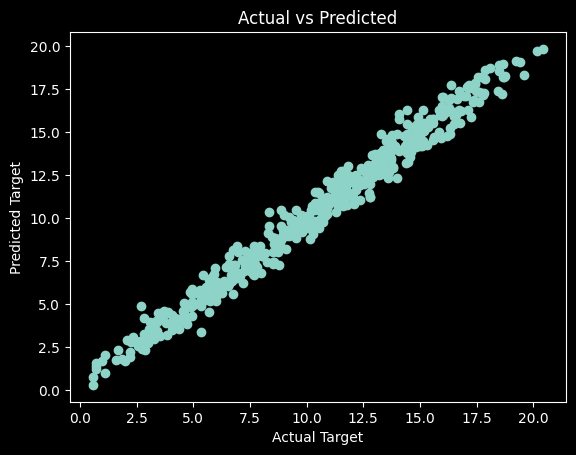

In [ ]:
# Model evaluation

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

"""
Intercept: 14.984657987225848
Coefficients: [-0.20013305  0.17833391]

Interpretation: biking lowers heartdisease; smoking increases heartdisease
"""

# model performance
from sklearn.metrics import r2_score

# Predict on training data
y_pred = model.predict(X)

# R² score
print("R^2 Score:", r2_score(y, y_pred))

"""
R^2 Score: 0.9796174523377278
Interpretation: the high R^2 indicated a very good model fit
"""

# Visualization of predictions

plt.scatter(y, y_pred)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted")
plt.show()

# Interpretation: the prediction of the model seems very good

In [ ]:
# training the model with Cross-Validation -->> this part was solved with the help of ChatGPT

from sklearn.model_selection import train_test_split

# splitting the dataset in training and test data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on training set
model.fit(X_train, y_train)

# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate performance (comparison of predictions)
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

"""
Result:Test R^2 Score: 0.9751106638392245

Interpretation: the Model trains nearly as good on new data, than it does on test data
"""

Test R^2 Score: 0.9751106638392245
